In [29]:
import numpy as np
from skimage.morphology import medial_axis
from skimage.util import invert
from scipy.spatial import Voronoi, voronoi_plot_2d

import sys
sys.path.append('../lib/')
from grid import colliders_grid
from planning import find_path
from visuals import Visuals


In [30]:
def closest_start_goal(skeleton, start, goal):
    sk_cells = np.transpose(skeleton.nonzero())

    start_min = np.linalg.norm(np.array(start) - np.array(sk_cells), axis=1).argmin()
    closest_start = sk_cells[start_min]

    goal_min = np.linalg.norm(np.array(goal) - np.array(sk_cells), axis=1).argmin()
    closest_goal = sk_cells[goal_min]

    return tuple(closest_start), tuple(closest_goal)


In [31]:
start = (700, 200)
goal = (310, 800)

obstacles_grid = colliders_grid('colliders.csv', drone_altitude=10)


In [32]:
skeleton = medial_axis(invert(obstacles_grid))
sk_start, sk_goal = closest_start_goal(skeleton, start, goal)

In [33]:
path, cost = find_path(invert(skeleton).astype(int), sk_start, sk_goal)

In [34]:
path2, cost2 = find_path(obstacles_grid, start, goal)

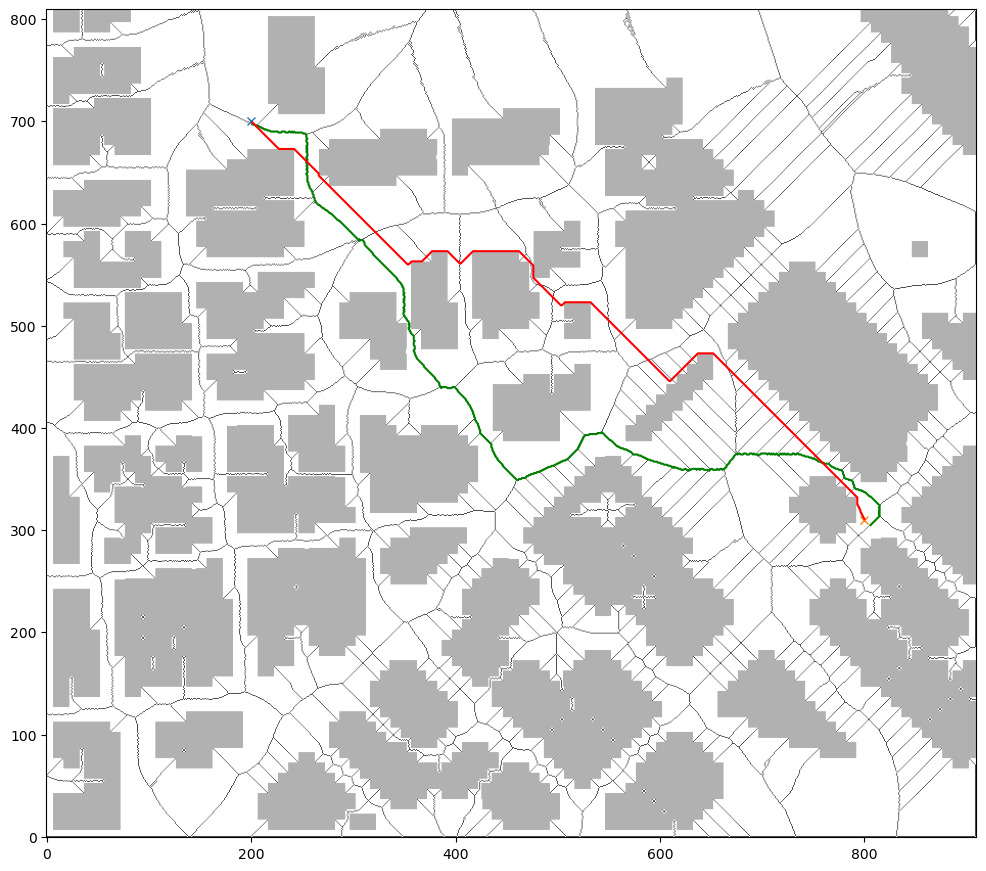

In [35]:
r = Visuals()
r.add_grid(obstacles_grid)
r.add_grid(skeleton)
r.add_point(start)
r.add_point(goal)
r.add_path(path, 'g')
r.add_path(path2, 'r')
r.show()
